In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table
from ISLP.models import ModelSpec as MS
from sklearn.tree import (DecisionTreeClassifier as DTC,
                          DecisionTreeRegressor,
                          plot_tree,
                          export_text)
from sklearn.metrics import (accuracy_score,
                             log_loss)
from sklearn.ensemble import \
     (RandomForestRegressor as RF,
      GradientBoostingRegressor as GBR)
from ISLP.bart import BART
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Data Preprocessing

In [2]:
#loading the csv file
df=pd.read_csv("youth_data.csv")
df.head()

,iralcfy,irmjfy,ircigfm,IRSMKLSS30N,iralcfm,irmjfm,ircigage,irsmklsstry,iralcage,irmjage,...,eduschlgo,EDUSCHGRD2,eduskpcom,imother,ifather,income,govtprog,POVERTY3,PDEN10,COUTYP4
0,993,991,91,91,93.0,91.0,991,991,12,991,...,1,5,0,1,1,4,2,3,2,2
1,991,991,91,91,91.0,91.0,991,991,991,991,...,1,5,0,1,1,4,2,3,1,1
2,993,993,93,91,93.0,93.0,13,991,13,13,...,1,4,0,1,1,4,1,3,1,1
3,991,991,91,91,91.0,91.0,991,991,991,991,...,1,7,0,1,1,2,2,1,2,2
4,991,991,91,91,91.0,91.0,991,991,991,991,...,1,3,0,1,1,4,2,3,2,2


In [3]:
#display columns and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 79 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   iralcfy      5500 non-null   int64  
 1   irmjfy       5500 non-null   int64  
 2   ircigfm      5500 non-null   int64  
 3   IRSMKLSS30N  5500 non-null   int64  
 4   iralcfm      5500 non-null   float64
 5   irmjfm       5500 non-null   float64
 6   ircigage     5500 non-null   int64  
 7   irsmklsstry  5500 non-null   int64  
 8   iralcage     5500 non-null   int64  
 9   irmjage      5500 non-null   int64  
 10  mrjflag      5500 non-null   int64  
 11  alcflag      5500 non-null   int64  
 12  tobflag      5500 non-null   int64  
 13  alcydays     5500 non-null   int64  
 14  mrjydays     5500 non-null   int64  
 15  alcmdays     5500 non-null   int64  
 16  mrjmdays     5500 non-null   int64  
 17  cigmdays     5500 non-null   int64  
 18  smklsmdays   5500 non-null   int64  
 19  schfel

In [4]:
#dropping duplicate rows
df.drop_duplicates(inplace=True)

In [5]:
#dropping rows having null values
df=df.dropna()

In [6]:
df.isna().sum()

iralcfy        0
irmjfy         0
ircigfm        0
IRSMKLSS30N    0
iralcfm        0
              ..
income         0
govtprog       0
POVERTY3       0
PDEN10         0
COUTYP4        0
Length: 79, dtype: int64

# Regression
## iralcage --alcohol age of first use
### RANGE = 1 - 66
### Method: Decision Tree Regressor

In [7]:
df.corr()


,iralcfy,irmjfy,ircigfm,IRSMKLSS30N,iralcfm,irmjfm,ircigage,irsmklsstry,iralcage,irmjage,...,eduschlgo,EDUSCHGRD2,eduskpcom,imother,ifather,income,govtprog,POVERTY3,PDEN10,COUTYP4
iralcfy,1.000000,0.505847,0.200616,0.104151,0.582621,0.402221,0.344839,0.215347,0.871142,0.524586,...,0.007524,-0.041367,-0.021906,-0.023668,0.007755,-0.062033,-0.031855,-0.075172,-0.017435,-0.027651
irmjfy,0.505847,1.000000,0.211089,0.101352,0.409150,0.663708,0.377101,0.225436,0.500621,0.893295,...,-0.008727,-0.046497,-0.032441,-0.026848,-0.038426,-0.009531,-0.004190,-0.011591,-0.013408,-0.021574
ircigfm,0.200616,0.211089,1.000000,0.202205,0.188892,0.269435,0.437386,0.264104,0.186367,0.233165,...,-0.009841,-0.060079,-0.055363,-0.037173,-0.026016,0.011648,0.015006,0.001156,-0.062501,-0.064109
IRSMKLSS30N,0.104151,0.101352,0.202205,1.000000,0.105629,0.077804,0.187793,0.487343,0.109571,0.120407,...,0.008503,-0.013410,-0.007919,-0.010341,-0.000499,-0.008260,-0.025880,-0.014336,-0.045583,-0.048503
iralcfm,0.582621,0.409150,0.188892,0.105629,1.000000,0.400261,0.291421,0.219283,0.510764,0.420731,...,-0.000466,-0.059337,-0.030600,-0.006010,0.006465,-0.055055,-0.017476,-0.054141,-0.004731,-0.017672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
income,-0.062033,-0.009531,0.011648,-0.008260,-0.055055,-0.021057,0.048654,-0.017285,-0.047337,0.000812,...,-0.029286,-0.036510,-0.079535,-0.082899,-0.388030,1.000000,0.538855,0.883219,-0.090690,-0.096409
govtprog,-0.031855,-0.004190,0.015006,-0.025880,-0.017476,-0.003245,0.036572,-0.032159,-0.023999,0.014217,...,-0.021977,-0.017155,-0.051303,-0.051395,-0.291269,0.538855,1.000000,0.567868,-0.042499,-0.040865
POVERTY3,-0.075172,-0.011591,0.001156,-0.014336,-0.054141,-0.019101,0.027760,-0.021881,-0.064840,-0.002196,...,-0.028142,-0.023484,-0.067025,-0.053638,-0.293021,0.883219,0.567868,1.000000,-0.069069,-0.075851
PDEN10,-0.017435,-0.013408,-0.062501,-0.045583,-0.004731,0.007493,-0.080876,-0.059250,-0.013851,-0.024033,...,0.018159,0.011684,0.024278,0.014955,0.000168,-0.090690,-0.042499,-0.069069,1.000000,0.855592


In [8]:
df.shape

(4262, 79)

In [9]:
df['iralcage'].unique()

array([ 12, 991,  13,  15,  16,  14,   8,   2,  10,  11,   9,  17,   6,
         3,   7,   5,   1,   4], dtype=int64)

In [10]:
#removing the rows that have iralcage value as a category
data = df.loc[(df['iralcage'] != 991), :]

In [11]:

data.corr()

,iralcfy,irmjfy,ircigfm,IRSMKLSS30N,iralcfm,irmjfm,ircigage,irsmklsstry,iralcage,irmjage,...,eduschlgo,EDUSCHGRD2,eduskpcom,imother,ifather,income,govtprog,POVERTY3,PDEN10,COUTYP4
iralcfy,1.000000,0.187299,0.083596,0.019681,0.325872,0.172410,0.034831,0.054999,-0.284825,0.143117,...,-0.031003,0.018145,0.011418,0.004333,0.057790,-0.085082,-0.044047,-0.078431,-0.021092,-0.000700
irmjfy,0.187299,1.000000,0.144037,0.051000,0.235923,0.601214,0.262400,0.143918,-0.062753,0.859082,...,-0.043450,-0.010197,-0.003887,-0.010936,-0.065358,0.004523,-0.002211,0.018246,-0.012966,-0.009178
ircigfm,0.083596,0.144037,1.000000,0.195213,0.116908,0.228935,0.421081,0.253995,0.010502,0.174203,...,-0.034427,-0.080716,-0.072490,-0.057323,-0.025510,0.002882,-0.007464,-0.005257,-0.120251,-0.119206
IRSMKLSS30N,0.019681,0.051000,0.195213,1.000000,0.064305,0.034720,0.159828,0.481201,0.005596,0.076717,...,0.014102,-0.012556,0.000223,-0.004058,0.034346,-0.025990,-0.050087,-0.032764,-0.084730,-0.091178
iralcfm,0.325872,0.235923,0.116908,0.064305,1.000000,0.281214,0.136934,0.142132,-0.055220,0.232560,...,-0.023802,-0.068657,-0.034783,0.018328,0.023655,-0.072388,-0.011960,-0.050486,0.005113,-0.003441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
income,-0.085082,0.004523,0.002882,-0.025990,-0.072388,-0.030492,0.103482,-0.018625,0.113888,0.025967,...,-0.052817,-0.068186,-0.103542,-0.120811,-0.385157,1.000000,0.479021,0.862056,-0.124209,-0.137768
govtprog,-0.044047,-0.002211,-0.007464,-0.050087,-0.011960,0.005874,0.073199,-0.048815,0.062507,0.037788,...,-0.099190,-0.034043,-0.040801,-0.029748,-0.222720,0.479021,1.000000,0.517477,-0.041864,-0.059689
POVERTY3,-0.078431,0.018246,-0.005257,-0.032764,-0.050486,-0.012675,0.085364,-0.017253,0.073315,0.049017,...,-0.067121,-0.059289,-0.084091,-0.087283,-0.273277,0.862056,0.517477,1.000000,-0.078076,-0.090255
PDEN10,-0.021092,-0.012966,-0.120251,-0.084730,0.005113,0.031257,-0.148152,-0.096132,-0.053126,-0.046704,...,-0.001843,-0.010968,0.004081,0.054247,0.018902,-0.124209,-0.041864,-0.078076,1.000000,0.856571


In [12]:
data.drop(columns=['iralcage','alcydays'],axis=1).columns

Index(['iralcfy', 'irmjfy', 'ircigfm', 'IRSMKLSS30N', 'iralcfm', 'irmjfm',
       'ircigage', 'irsmklsstry', 'irmjage', 'mrjflag', 'alcflag', 'tobflag',
       'mrjydays', 'alcmdays', 'mrjmdays', 'cigmdays', 'smklsmdays', 'schfelt',
       'tchgjob', 'avggrade', 'stndscig', 'stndsmj', 'stndalc', 'stnddnk',
       'parchkhw', 'parhlphw', 'PRCHORE2', 'PRLMTTV2', 'parlmtsn', 'PRGDJOB2',
       'PRPROUD2', 'argupar', 'YOFIGHT2', 'YOGRPFT2', 'YOHGUN2', 'YOSELL2',
       'YOSTOLE2', 'YOATTAK2', 'PRPKCIG2', 'PRMJEVR2', 'prmjmo', 'PRALDLY2',
       'YFLPKCG2', 'YFLTMRJ2', 'yflmjmo', 'YFLADLY2', 'FRDPCIG2', 'FRDMEVR2',
       'frdmjmon', 'FRDADLY2', 'talkprob', 'PRTALK3', 'PRBSOLV2', 'PREVIOL2',
       'PRVDRGO2', 'GRPCNSL2', 'PREGPGM2', 'YTHACT2', 'DRPRVME3', 'ANYEDUC3',
       'rlgattd', 'rlgimpt', 'rlgdcsn', 'rlgfrnd', 'irsex', 'NEWRACE2',
       'HEALTH2', 'eduschlgo', 'EDUSCHGRD2', 'eduskpcom', 'imother', 'ifather',
       'income', 'govtprog', 'POVERTY3', 'PDEN10', 'COUTYP4'],
      dtype

In [13]:
#creating feature matrix
model = MS(data.drop(columns=['iralcage','alcydays'],axis=1).columns, intercept=False)
D = model.fit_transform(data)
feature_names = list(D.columns)
X = np.asarray(D)
#list(D.columns)

In [14]:
#splitting dataset into train and test sets
(X_train,
 X_test,
 y_train,
 y_test) = skm.train_test_split(X,
                                data['iralcage'],
                                test_size=0.3,
                                random_state=0)
X_test.shape

(347, 77)

In [15]:
# #applying decision tree regressor model 
# reg = DTR()
# reg.fit(X_train, y_train)


In [16]:
# #use the cost_complexity_pruning_path() method of clf to extract cost-complexity values and extracting an optimal one by cross-validation.
# ccp_path = reg.cost_complexity_pruning_path(X_train, y_train)
# kfold = skm.KFold(5,
#                   shuffle=True,
#                   random_state=10)
# grid = skm.GridSearchCV(reg,
#                         {'ccp_alpha': ccp_path.ccp_alphas},
#                         refit=True,
#                         cv=kfold,
#                         scoring='neg_mean_squared_error')
# G = grid.fit(X_train, y_train)


In [17]:
# #calculate MSE
# best_ = grid.best_estimator_
# np.mean((y_test - best_.predict(X_test))**2)


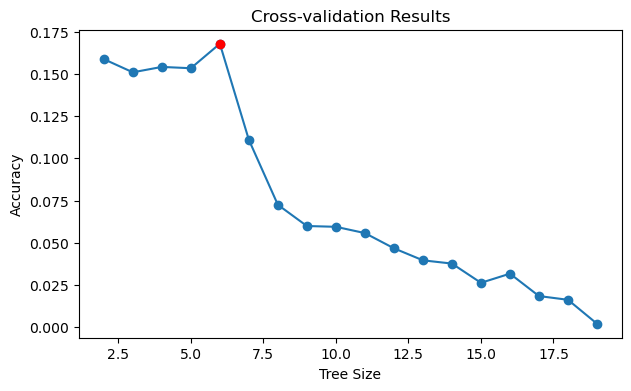

In [18]:
# fit decision tree model
tree_ = DecisionTreeRegressor(random_state = 1)
tree_.fit(X_train, y_train)

# cross-validation to determine optimal tree size
params = {'max_leaf_nodes': range(2, 20)}  
cv_ = GridSearchCV(tree_, params, cv=20)
cv_.fit(X_train, y_train)
cv_results = cv_.cv_results_

# find the best score for max leaf nodes
best_size = cv_.best_params_['max_leaf_nodes']
best_score = cv_.best_score_

# plot results of cross-validation
plt.figure(figsize=(7, 4))
plt.plot(cv_results["param_max_leaf_nodes"].data, cv_results["mean_test_score"], 'o-')
plt.plot(best_size, best_score, 'ro-')
plt.xlabel('Tree Size')
plt.ylabel('Accuracy')
plt.title('Cross-validation Results');

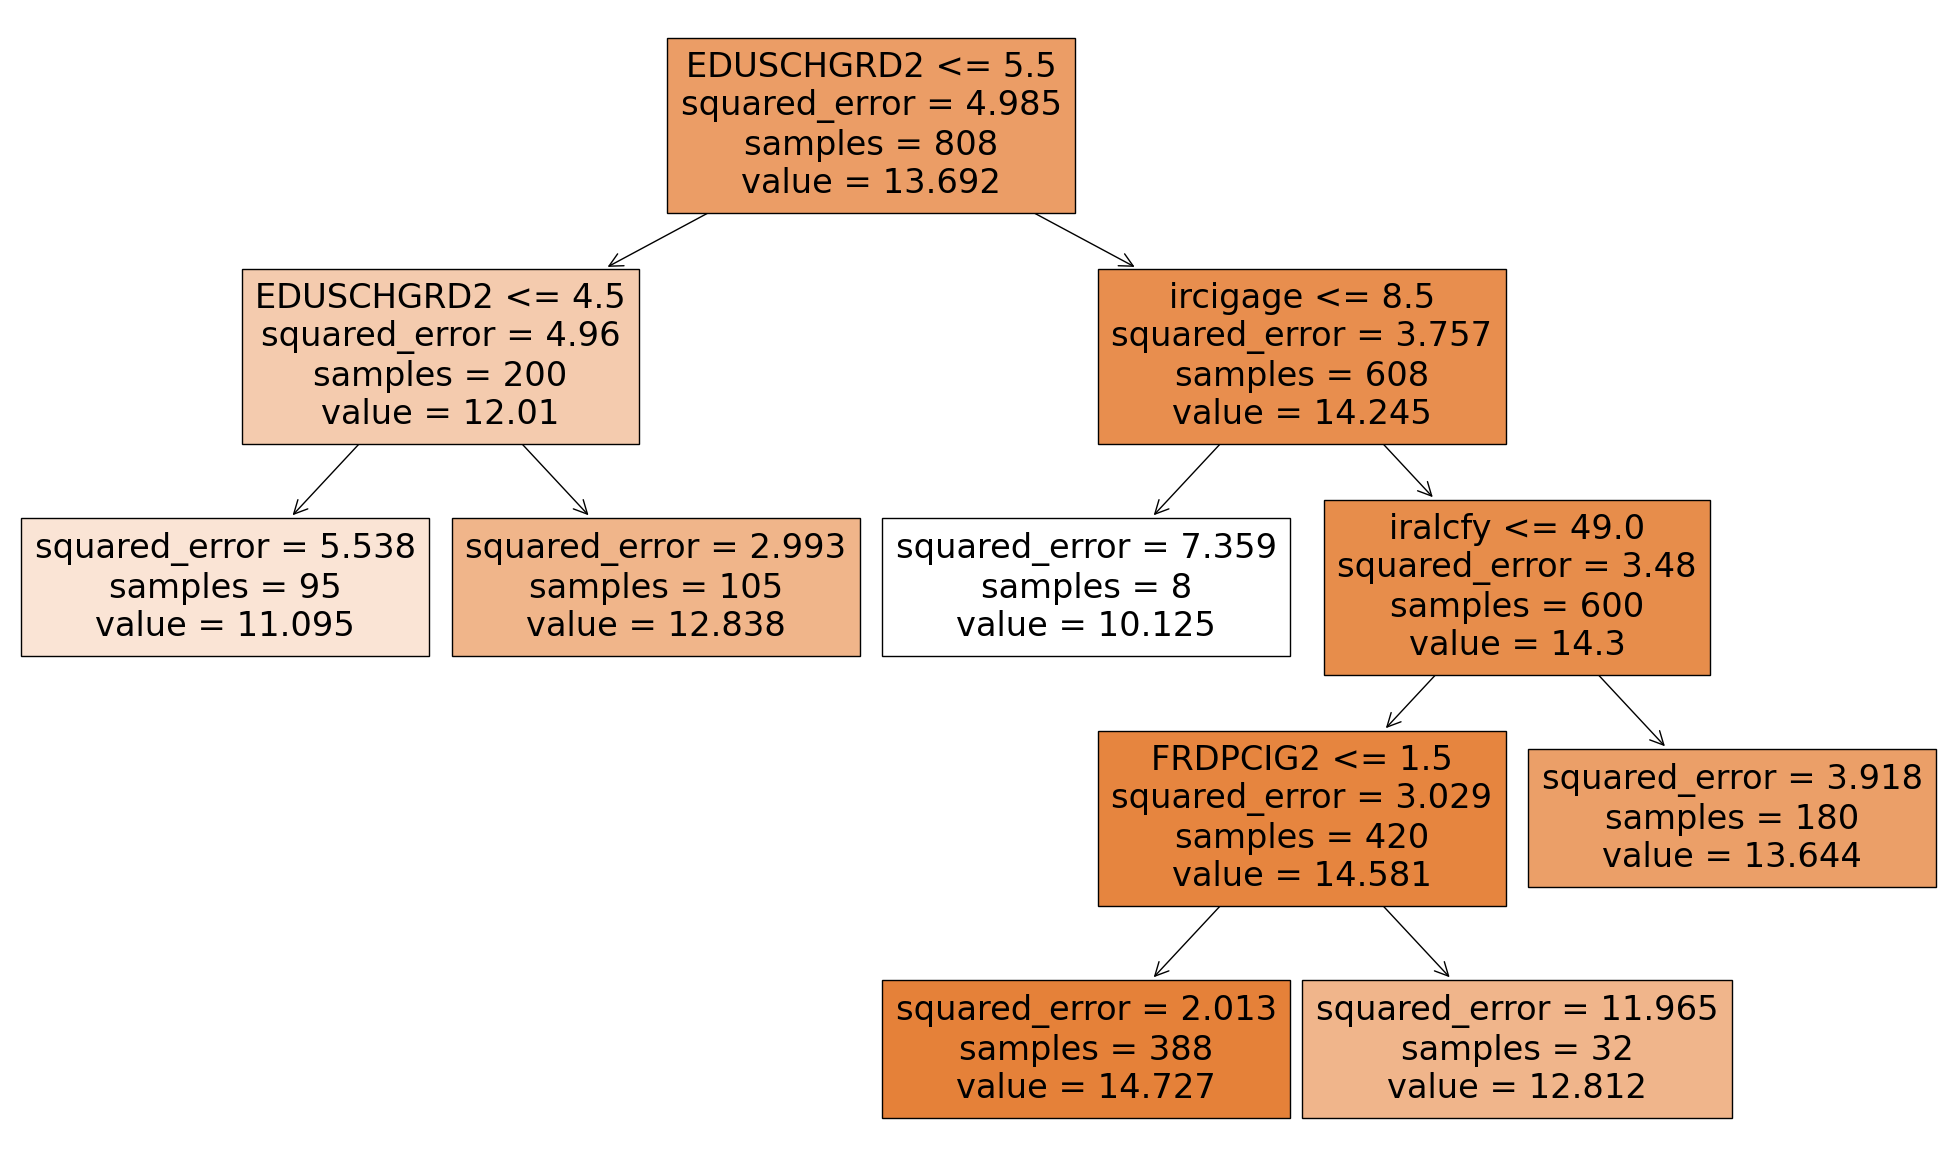

In [19]:
# prune tree using optimal size
prune_ = DecisionTreeRegressor(random_state = 1, max_leaf_nodes = best_size)
prune_.fit(X_train, y_train)

# plot pruned tree
plt.figure(figsize=(25,15))
plt.title('Pruned Tree')
plot_tree(prune_, feature_names=feature_names, filled=True);

In [20]:
# Calculate MSE
MSE = ((y_test - prune_.predict(X_test))**2).mean()
print(MSE)

4.029972396173291


In [21]:
#extract features and their importances
importances = pd.DataFrame({'feature_name': feature_names, 'importance': prune_.feature_importances_})
importances = importances.sort_values('importance', ascending=False).reset_index(drop=True)
print(importances)

   feature_name  importance
0    EDUSCHGRD2    0.717067
1      ircigage    0.109229
2       iralcfy    0.087716
3      FRDPCIG2    0.085989
4      YFLPKCG2    0.000000
..          ...         ...
72     parhlphw    0.000000
73     parchkhw    0.000000
74      stnddnk    0.000000
75      stndalc    0.000000
76      COUTYP4    0.000000

[77 rows x 2 columns]


In [22]:
tree_summary = export_text(prune_, feature_names=feature_names)
print(tree_summary)

|--- EDUSCHGRD2 <= 5.50
|   |--- EDUSCHGRD2 <= 4.50
|   |   |--- value: [11.09]
|   |--- EDUSCHGRD2 >  4.50
|   |   |--- value: [12.84]
|--- EDUSCHGRD2 >  5.50
|   |--- ircigage <= 8.50
|   |   |--- value: [10.12]
|   |--- ircigage >  8.50
|   |   |--- iralcfy <= 49.00
|   |   |   |--- FRDPCIG2 <= 1.50
|   |   |   |   |--- value: [14.73]
|   |   |   |--- FRDPCIG2 >  1.50
|   |   |   |   |--- value: [12.81]
|   |   |--- iralcfy >  49.00
|   |   |   |--- value: [13.64]



# Binary classification
## mrjflag -- marijuana ever used (0=never, 1=ever)
### Method: Bagging

In [23]:

df.corr()

,iralcfy,irmjfy,ircigfm,IRSMKLSS30N,iralcfm,irmjfm,ircigage,irsmklsstry,iralcage,irmjage,...,eduschlgo,EDUSCHGRD2,eduskpcom,imother,ifather,income,govtprog,POVERTY3,PDEN10,COUTYP4
iralcfy,1.000000,0.505847,0.200616,0.104151,0.582621,0.402221,0.344839,0.215347,0.871142,0.524586,...,0.007524,-0.041367,-0.021906,-0.023668,0.007755,-0.062033,-0.031855,-0.075172,-0.017435,-0.027651
irmjfy,0.505847,1.000000,0.211089,0.101352,0.409150,0.663708,0.377101,0.225436,0.500621,0.893295,...,-0.008727,-0.046497,-0.032441,-0.026848,-0.038426,-0.009531,-0.004190,-0.011591,-0.013408,-0.021574
ircigfm,0.200616,0.211089,1.000000,0.202205,0.188892,0.269435,0.437386,0.264104,0.186367,0.233165,...,-0.009841,-0.060079,-0.055363,-0.037173,-0.026016,0.011648,0.015006,0.001156,-0.062501,-0.064109
IRSMKLSS30N,0.104151,0.101352,0.202205,1.000000,0.105629,0.077804,0.187793,0.487343,0.109571,0.120407,...,0.008503,-0.013410,-0.007919,-0.010341,-0.000499,-0.008260,-0.025880,-0.014336,-0.045583,-0.048503
iralcfm,0.582621,0.409150,0.188892,0.105629,1.000000,0.400261,0.291421,0.219283,0.510764,0.420731,...,-0.000466,-0.059337,-0.030600,-0.006010,0.006465,-0.055055,-0.017476,-0.054141,-0.004731,-0.017672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
income,-0.062033,-0.009531,0.011648,-0.008260,-0.055055,-0.021057,0.048654,-0.017285,-0.047337,0.000812,...,-0.029286,-0.036510,-0.079535,-0.082899,-0.388030,1.000000,0.538855,0.883219,-0.090690,-0.096409
govtprog,-0.031855,-0.004190,0.015006,-0.025880,-0.017476,-0.003245,0.036572,-0.032159,-0.023999,0.014217,...,-0.021977,-0.017155,-0.051303,-0.051395,-0.291269,0.538855,1.000000,0.567868,-0.042499,-0.040865
POVERTY3,-0.075172,-0.011591,0.001156,-0.014336,-0.054141,-0.019101,0.027760,-0.021881,-0.064840,-0.002196,...,-0.028142,-0.023484,-0.067025,-0.053638,-0.293021,0.883219,0.567868,1.000000,-0.069069,-0.075851
PDEN10,-0.017435,-0.013408,-0.062501,-0.045583,-0.004731,0.007493,-0.080876,-0.059250,-0.013851,-0.024033,...,0.018159,0.011684,0.024278,0.014955,0.000168,-0.090690,-0.042499,-0.069069,1.000000,0.855592


In [24]:
#creating feature matrix
#split into train and test sets
data=df.drop(columns=['mrjflag','irmjfy','irmjfm','irmjage','mrjydays','mrjmdays'])
model = MS(data.columns, intercept=False)
D = model.fit_transform(data)
feature_names = list(D.columns)
X = np.asarray(D)

(X_train,
 X_test,
 y_train,
 y_test) = skm.train_test_split(X,
                                df['mrjflag'],
                                test_size=0.3,
                                random_state=50)


In [25]:
#fit RandomForestClassifier 
clf = RandomForestClassifier(max_features=X_train.shape[1],n_estimators=500, random_state=80)
clf.fit(X_train, y_train)


RandomForestClassifier(max_features=73, n_estimators=500, random_state=80)

In [26]:
print("Number of trees:", clf.n_estimators)
print("Number of features tried at each split:",clf.max_features)
print("Training score: {:.2f}%".format(clf.score(X_train,y_train)*100))

Number of trees: 500
Number of features tried at each split: 73
Training score: 100.00%


In [27]:
y_hat_bag = clf.predict(X_test)

In [28]:
#calculate MSE
accuracy_score(y_test, y_hat_bag)


0.9053948397185301

In [29]:
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_hat_bag)*100))

Accuracy: 90.54%


In [30]:
#extract features and their importances
feature_imp = pd.DataFrame(
    {'importance':clf.feature_importances_},
    index=feature_names)
features=feature_imp.sort_values(by='importance', ascending=False)
features

,importance
iralcage,0.121223
iralcfy,0.090752
alcflag,0.068737
alcydays,0.059024
frdmjmon,0.054589
...,...
PREVIOL2,0.002479
PREGPGM2,0.002451
eduschlgo,0.002271
cigmdays,0.001656


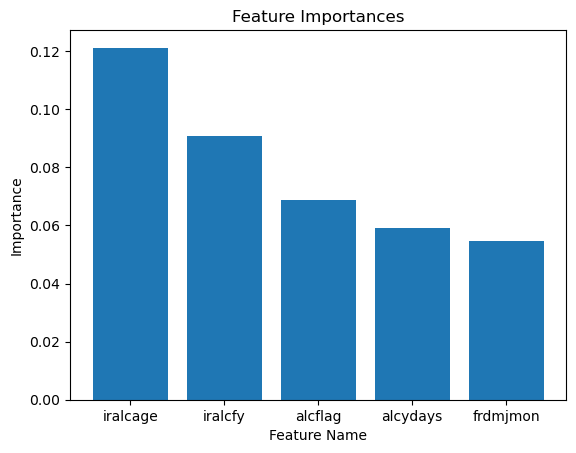

In [31]:
# bar plot of feature importances
plt.bar(features.index[:5], features.importance[:5])
plt.xlabel('Feature Name')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

In [32]:
#printing confusion table
confusion_table(y_hat_bag,y_test)


Truth,0,1
Predicted,,
0,1028,66
1,55,130


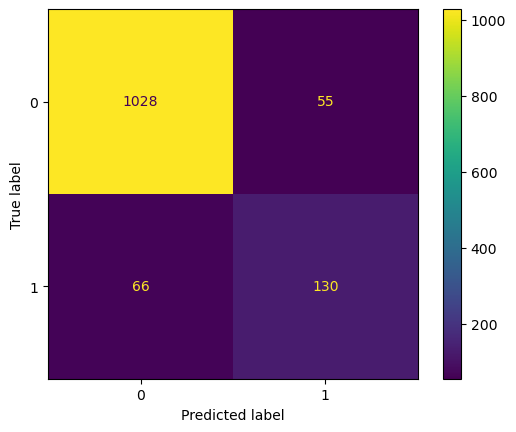

In [33]:
ConfusionMatrixDisplay.from_predictions(y_test, y_hat_bag)

# Multi-class classification 
## cigmdays -- number of days of cigarettes in past month (1-5 categories, 6=none)
### Method: Random Forest Classifier

In [34]:

df.corr()

,iralcfy,irmjfy,ircigfm,IRSMKLSS30N,iralcfm,irmjfm,ircigage,irsmklsstry,iralcage,irmjage,...,eduschlgo,EDUSCHGRD2,eduskpcom,imother,ifather,income,govtprog,POVERTY3,PDEN10,COUTYP4
iralcfy,1.000000,0.505847,0.200616,0.104151,0.582621,0.402221,0.344839,0.215347,0.871142,0.524586,...,0.007524,-0.041367,-0.021906,-0.023668,0.007755,-0.062033,-0.031855,-0.075172,-0.017435,-0.027651
irmjfy,0.505847,1.000000,0.211089,0.101352,0.409150,0.663708,0.377101,0.225436,0.500621,0.893295,...,-0.008727,-0.046497,-0.032441,-0.026848,-0.038426,-0.009531,-0.004190,-0.011591,-0.013408,-0.021574
ircigfm,0.200616,0.211089,1.000000,0.202205,0.188892,0.269435,0.437386,0.264104,0.186367,0.233165,...,-0.009841,-0.060079,-0.055363,-0.037173,-0.026016,0.011648,0.015006,0.001156,-0.062501,-0.064109
IRSMKLSS30N,0.104151,0.101352,0.202205,1.000000,0.105629,0.077804,0.187793,0.487343,0.109571,0.120407,...,0.008503,-0.013410,-0.007919,-0.010341,-0.000499,-0.008260,-0.025880,-0.014336,-0.045583,-0.048503
iralcfm,0.582621,0.409150,0.188892,0.105629,1.000000,0.400261,0.291421,0.219283,0.510764,0.420731,...,-0.000466,-0.059337,-0.030600,-0.006010,0.006465,-0.055055,-0.017476,-0.054141,-0.004731,-0.017672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
income,-0.062033,-0.009531,0.011648,-0.008260,-0.055055,-0.021057,0.048654,-0.017285,-0.047337,0.000812,...,-0.029286,-0.036510,-0.079535,-0.082899,-0.388030,1.000000,0.538855,0.883219,-0.090690,-0.096409
govtprog,-0.031855,-0.004190,0.015006,-0.025880,-0.017476,-0.003245,0.036572,-0.032159,-0.023999,0.014217,...,-0.021977,-0.017155,-0.051303,-0.051395,-0.291269,0.538855,1.000000,0.567868,-0.042499,-0.040865
POVERTY3,-0.075172,-0.011591,0.001156,-0.014336,-0.054141,-0.019101,0.027760,-0.021881,-0.064840,-0.002196,...,-0.028142,-0.023484,-0.067025,-0.053638,-0.293021,0.883219,0.567868,1.000000,-0.069069,-0.075851
PDEN10,-0.017435,-0.013408,-0.062501,-0.045583,-0.004731,0.007493,-0.080876,-0.059250,-0.013851,-0.024033,...,0.018159,0.011684,0.024278,0.014955,0.000168,-0.090690,-0.042499,-0.069069,1.000000,0.855592


In [35]:
data=df.drop(columns=['cigmdays','ircigfm','ircigage'])

In [36]:
#creating feature matrix and split data into train and test
model = MS(data.columns, intercept=False)
D = model.fit_transform(data)
feature_names = list(D.columns)
X = np.asarray(D)

(X_train,
 X_test,
 y_train,
 y_test) = skm.train_test_split(X,
                                df['cigmdays'],
                                test_size=0.3,
                                random_state=90)


In [37]:
X_train.shape

(2983, 76)

In [38]:
np.arange(1,77)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76])

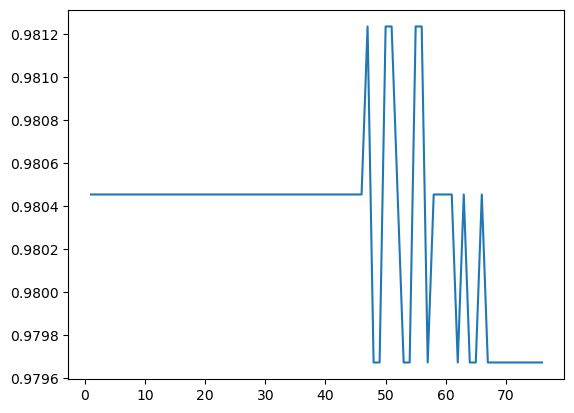

In [39]:
#finding out optimal number of max_features through test accuracy
li=[]
for i in range(1,77):
    RF = RandomForestClassifier(max_features=i,n_estimators=500,
                   random_state=0).fit(X_train, y_train)
    y_hat_RF = RF.predict(X_test)
    li.append(accuracy_score(y_test, y_hat_RF))
plt.plot(np.arange(1,77),li)

In [40]:
np.max(li[0:49])

0.9812353401094606

In [41]:
li.index(np.max(li[0:49]))

46

In [42]:
#fitting RandomForestClassifier with max_features that has highest test accuracy
RF = RandomForestClassifier(max_features=47,n_estimators=500,
                random_state=0).fit(X_train, y_train)
y_hat_RF = RF.predict(X_test)
accuracy_score(y_test, y_hat_RF)

0.9812353401094606

In [43]:
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_hat_RF)*100))

Accuracy: 98.12%


In [44]:
#printing features and its importances
feature_imp = pd.DataFrame(
    {'importance':RF.feature_importances_},
    index=feature_names)
features=feature_imp.sort_values(by='importance', ascending=False)
features

,importance
tobflag,0.079515
irmjfy,0.047906
irmjfm,0.045658
PRPKCIG2,0.038287
iralcfy,0.037453
...,...
YOSTOLE2,0.003646
PREVIOL2,0.003053
mrjflag,0.002299
alcflag,0.001556


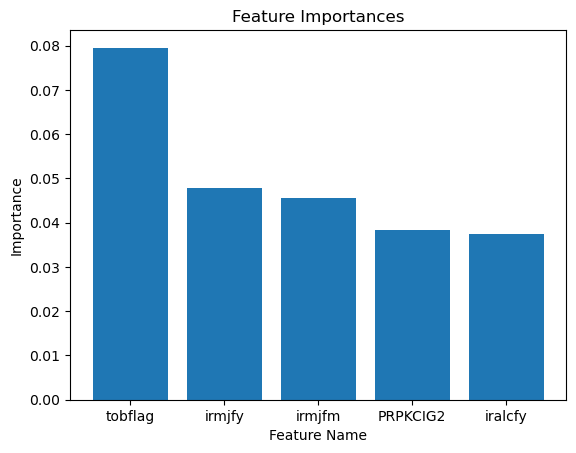

In [45]:
# bar plot of feature importances
plt.bar(features.index[:5], features.importance[:5])
plt.xlabel('Feature Name')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

In [46]:
#printing confusion table
confusion_table(y_hat_RF,y_test)


Truth,1,2,3,4,5,6
Predicted,,,,,,
1,1,0,1,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
5,0,0,0,0,0,0
6,11,4,5,2,1,1254


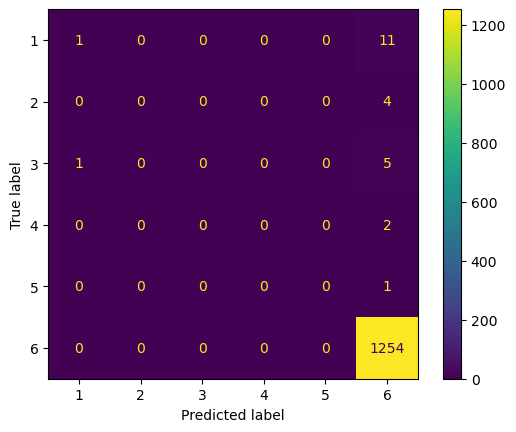

In [47]:
ConfusionMatrixDisplay.from_predictions(y_test, y_hat_RF)